# <center> <span style="font-family: Comic Shanns, sans-serif; color:palegreen">Random Forest</span> </center>
## <center> <span style="font-family: Comic Shanns, sans-serif; color:navyblue">Random Forest Explainer</span> </center>


<span style="font-family: Comic Shanns, sans-serif; color:navyblue">Author: <a href="https://github.com/deburky" title="GitHub link">https://github.com/deburky</a></span>

## <span style="font-family: Comic Shanns, sans-serif; color:navyblue">Credit Card Balance Data</span>

The [dataset](https://islp.readthedocs.io/en/latest/datasets/Credit.html#source) comes from Introduction to Statistical Learning with Applications in P (ISLP) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. 

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from ISLP import load_data
%config InlineBackend.figure_format = 'retina'
 
# use style of plt
plt.style.use('seaborn-v0_8-bright')

Credit = load_data('Credit')
Credit['Approved'] = Credit['Rating'].apply(lambda x: 1 if x >= 500 else 0)

features = ['Income', 'Balance']
label = 'Approved'
X, y = Credit[features].values, Credit[label].values

X_train, y_train = X[:200], y[:200]
X_test, y_test = X[200:], y[200:]

rf = RandomForestClassifier(
    max_depth=7,
    n_estimators=100,
    random_state=42,
    bootstrap=True,
    min_samples_leaf=1,
    monotonic_cst=[1, 1]
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, monotonic_cst=[1, 1], random_state=42)

{'p0': 0.0, 'p1': 1.0}


Balance <= 960.50 [Samples: 130, Impurity: 0.2755, P(C=1): 0.17]
|   Income <= 63.98 [Samples: 105, Impurity: 0.0822, P(C=1): 0.04]
|   |   Leaf (Yes) [Samples: 93, Impurity: 0.0000, P(C=1): 0.00]
|   |   Leaf (No) [Samples: 12, Impurity: 0.4444, P(C=1): 0.33]
|   Balance <= 1436.50 [Samples: 25, Impurity: 0.4178, P(C=1): 0.70]
|   |   Balance <= 1101.00 [Samples: 19, Impurity: 0.4829, P(C=1): 0.59]
|   |   |   Leaf (Yes) [Samples: 8, Impurity: 0.5000, P(C=1): 0.50]
|   |   |   Leaf (No) [Samples: 11, Impurity: 0.4444, P(C=1): 0.67]
|   |   Leaf (No) [Samples: 6, Impurity: 0.0000, P(C=1): 1.00]

None

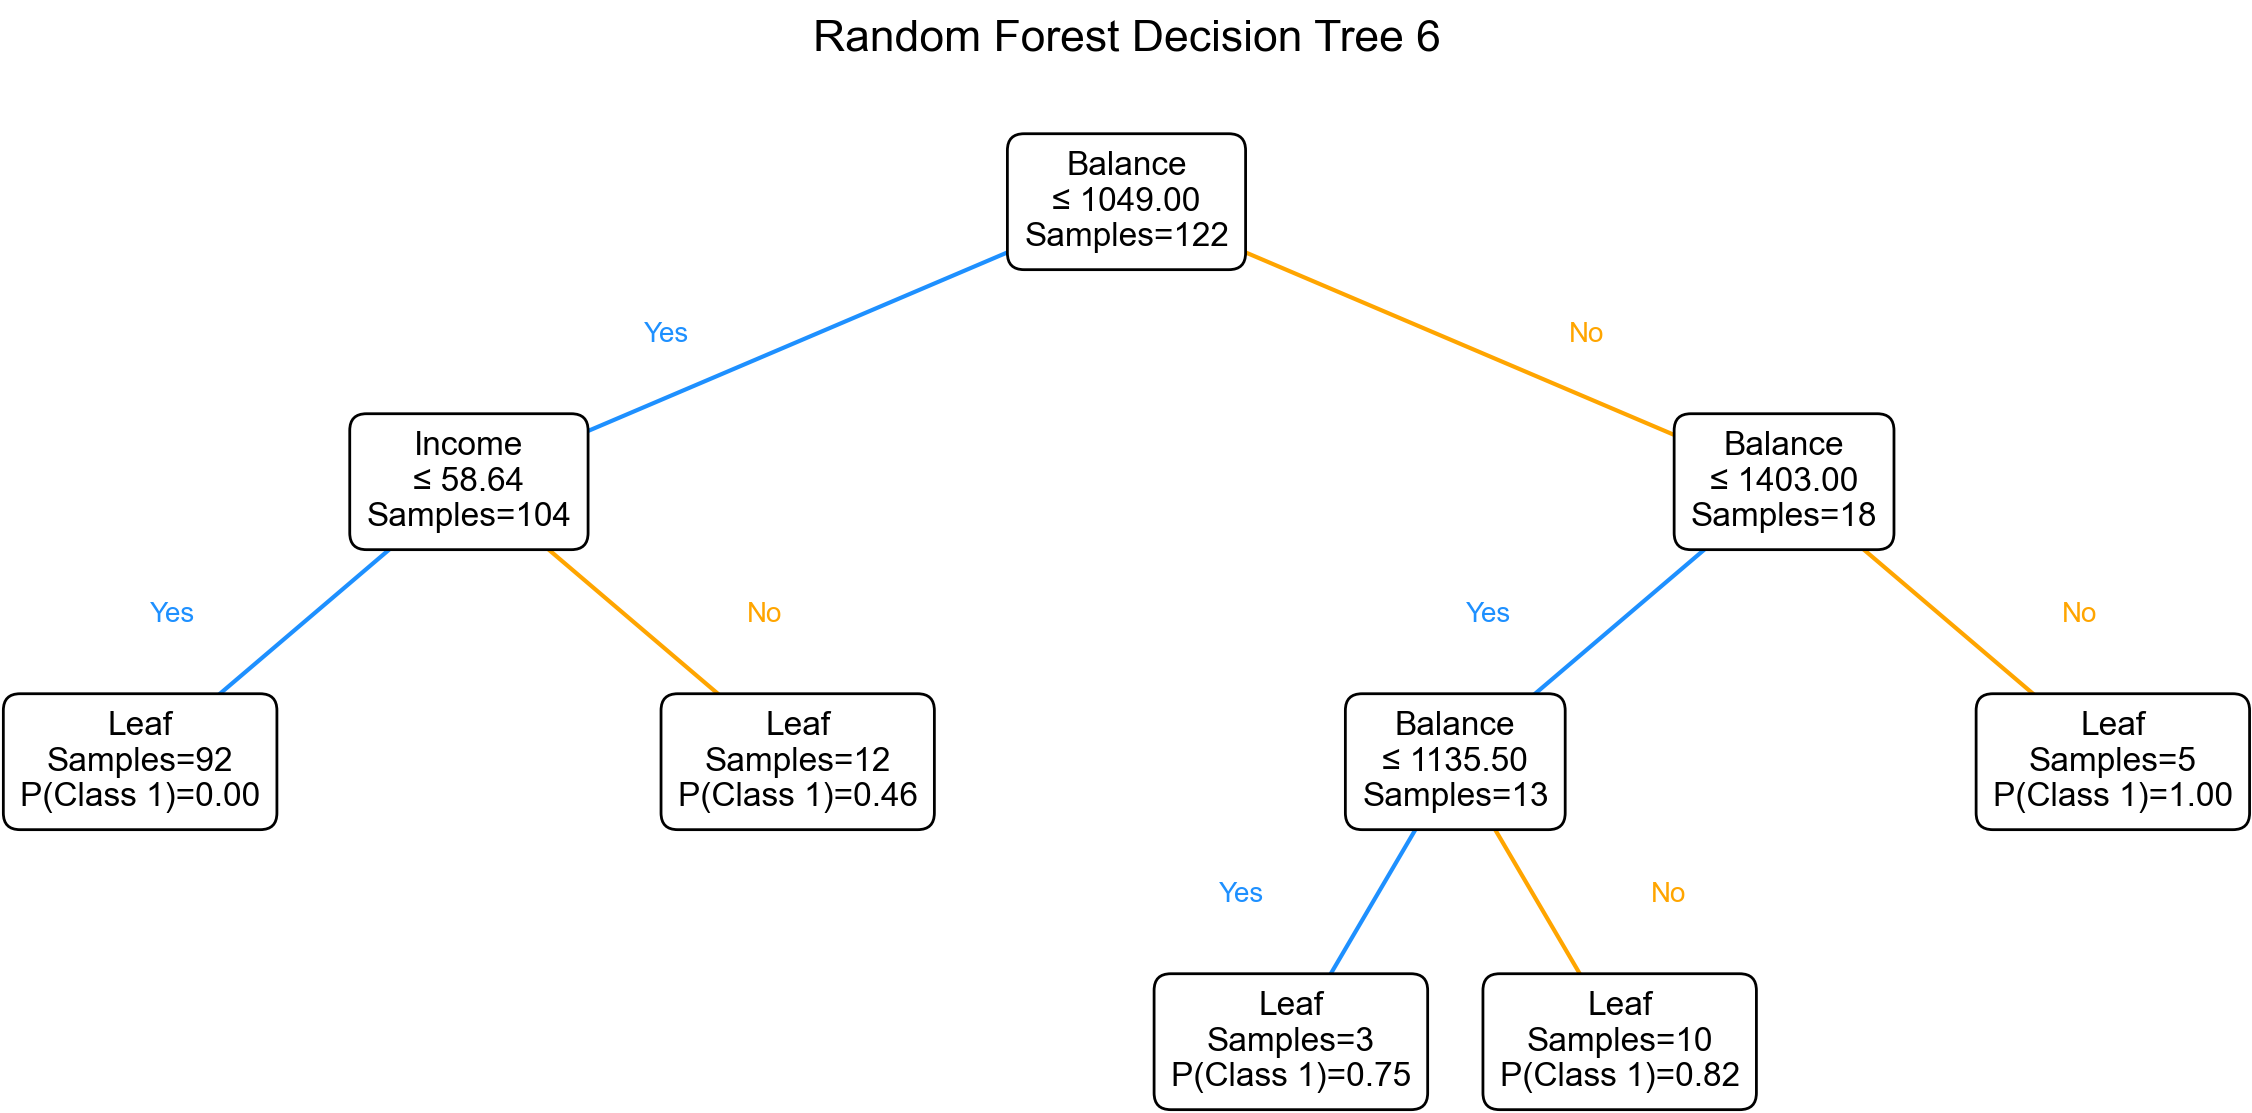

In [8]:
from rf_explainer import RandomForestVisualizer, RandomForestAnalyzer

analyzer = RandomForestAnalyzer(rf, features, ["Good", "Bad"])
tree_data = analyzer.extract_tree_data_with_conditions()
leaf_data = analyzer.extract_leaf_nodes_with_conditions()

# Predict data point
data_point = {"Income": 50, "Balance": 3000}
prediction = analyzer.predict_from_tree(data_point, tree_id=0)
print(prediction)

display(analyzer.print_tree(tree_id=0))

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

visualizer = RandomForestVisualizer(tree_data)
visualizer.plot_tree(tree_id=5, figsize=(14, 6),  level_distance=1, sibling_distance=10)

In [10]:
display(tree_data.query("TreeID == 1").head(10))

,TreeID,NodeID,Feature,Condition,Threshold,Impurity,Samples,PClass0,PClass1,ChildType,ChildNodeID
13,1,0,Income,<=,82.355999,0.325950,126,0.795000,0.205000,Left,1.0
14,1,0,Income,>,82.355999,0.325950,126,0.795000,0.205000,Right,8.0
15,1,1,Income,<=,57.614000,0.104332,107,0.944785,0.055215,Left,2.0
16,1,1,Income,>,57.614000,0.104332,107,0.944785,0.055215,Right,5.0
17,1,2,Income,<=,43.611000,0.014285,90,0.992806,0.007194,Left,3.0
18,1,2,Income,>,43.611000,0.014285,90,0.992806,0.007194,Right,4.0
19,1,3,Leaf,None,NaN,0.000000,78,1.000000,0.000000,None,NaN
20,1,4,Leaf,None,NaN,0.117188,12,0.937500,0.062500,None,NaN
21,1,5,Balance,<=,1293.500000,0.444444,17,0.666667,0.333333,Left,6.0
22,1,5,Balance,>,1293.500000,0.444444,17,0.666667,0.333333,Right,7.0


## <span style="font-family: Comic Shanns, sans-serif; color:navyblue">Credit Scoring Data</span>

This is a blended dataset from an unpublished paper on explainable credit scoring with machine learning.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Fetch blended credit data
url = (
    "https://drive.google.com/file/d/1Is8UZnPRExI-SLJMle8GRbFGpha5IvYZ/view?usp=sharing"
)
url = "https://drive.google.com/uc?id=" + url.split("/")[-2]
dataset = pd.read_csv(url, index_col=False)

features = [
    "revolving_utilization_of_unsecured_lines",
    "account_never_delinq_percent",
    "external_risk_estimate",
]

X, y = dataset[features], dataset["is_bad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(
    max_depth=7,
    n_estimators=1000,
    random_state=42,
    bootstrap=True,
    min_samples_leaf=1,
    monotonic_cst=[1, -1, -1]
)
rf.fit(X_train, y_train)

# 2 * roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]) - 1

RandomForestClassifier(max_depth=7, monotonic_cst=[1, -1, -1],
                       n_estimators=1000, random_state=42)

revolving_utilization_of_unsecured_lines <= 0.53 [Samples: 5057, Impurity: 0.1818, P(C=1): 0.10]
|   account_never_delinq_percent <= 96.85 [Samples: 3668, Impurity: 0.0857, P(C=1): 0.04]
|   |   Leaf (Yes) [Samples: 1204, Impurity: 0.2216, P(C=1): 0.13]
|   |   external_risk_estimate <= 68.50 [Samples: 2464, Impurity: 0.0097, P(C=1): 0.00]
|   |   |   external_risk_estimate <= 64.50 [Samples: 566, Impurity: 0.0271, P(C=1): 0.01]
|   |   |   |   Leaf (Yes) [Samples: 365, Impurity: 0.0276, P(C=1): 0.01]
|   |   |   |   Leaf (No) [Samples: 201, Impurity: 0.0262, P(C=1): 0.01]
|   |   |   revolving_utilization_of_unsecured_lines <= 0.10 [Samples: 1898, Impurity: 0.0046, P(C=1): 0.00]
|   |   |   |   external_risk_estimate <= 85.50 [Samples: 1061, Impurity: 0.0036, P(C=1): 0.00]
|   |   |   |   |   Leaf (Yes) [Samples: 824, Impurity: 0.0046, P(C=1): 0.00]
|   |   |   |   |   Leaf (No) [Samples: 237, Impurity: 0.0000, P(C=1): 0.00]
|   |   |   |   Leaf (No) [Samples: 837, Impurity: 0.0059, P(C=1): 0.00]
|   revolving_utilization_of_unsecured_lines <= 0.88 [Samples: 1389, Impurity: 0.3760, P(C=1): 0.25]
|   |   external_risk_estimate <= 90.50 [Samples: 621, Impurity: 0.3100, P(C=1): 0.19]
|   |   |   Leaf (Yes) [Samples: 597, Impurity: 0.3109, P(C=1): 0.19]
|   |   |   Leaf (No) [Samples: 24, Impurity: 0.2841, P(C=1): 0.17]
|   |   external_risk_estimate <= 60.50 [Samples: 768, Impurity: 0.4206, P(C=1): 0.30]
|   |   |   account_never_delinq_percent <= 93.65 [Samples: 122, Impurity: 0.4830, P(C=1): 0.59]
|   |   |   |   external_risk_estimate <= 58.50 [Samples: 52, Impurity: 0.2975, P(C=1): 0.82]
|   |   |   |   |   Leaf (Yes) [Samples: 41, Impurity: 0.2919, P(C=1): 0.82]
|   |   |   |   |   revolving_utilization_of_unsecured_lines <= 0.99 [Samples: 11, Impurity: 0.3200, P(C=1): 0.80]
|   |   |   |   |   |   Leaf (Yes) [Samples: 6, Impurity: 0.3200, P(C=1): 0.80]
|   |   |   |   |   |   Leaf (No) [Samples: 5, Impurity: 0.3200, P(C=1): 0.80]
|   |   |   |   Leaf (No) [Samples: 70, Impurity: 0.4877, P(C=1): 0.42]
|   |   |   revolving_utilization_of_unsecured_lines <= 0.94 [Samples: 646, Impurity: 0.3740, P(C=1): 0.25]
|   |   |   |   Leaf (Yes) [Samples: 97, Impurity: 0.3715, P(C=1): 0.25]
|   |   |   |   Leaf (No) [Samples: 549, Impurity: 0.3744, P(C=1): 0.25]

None


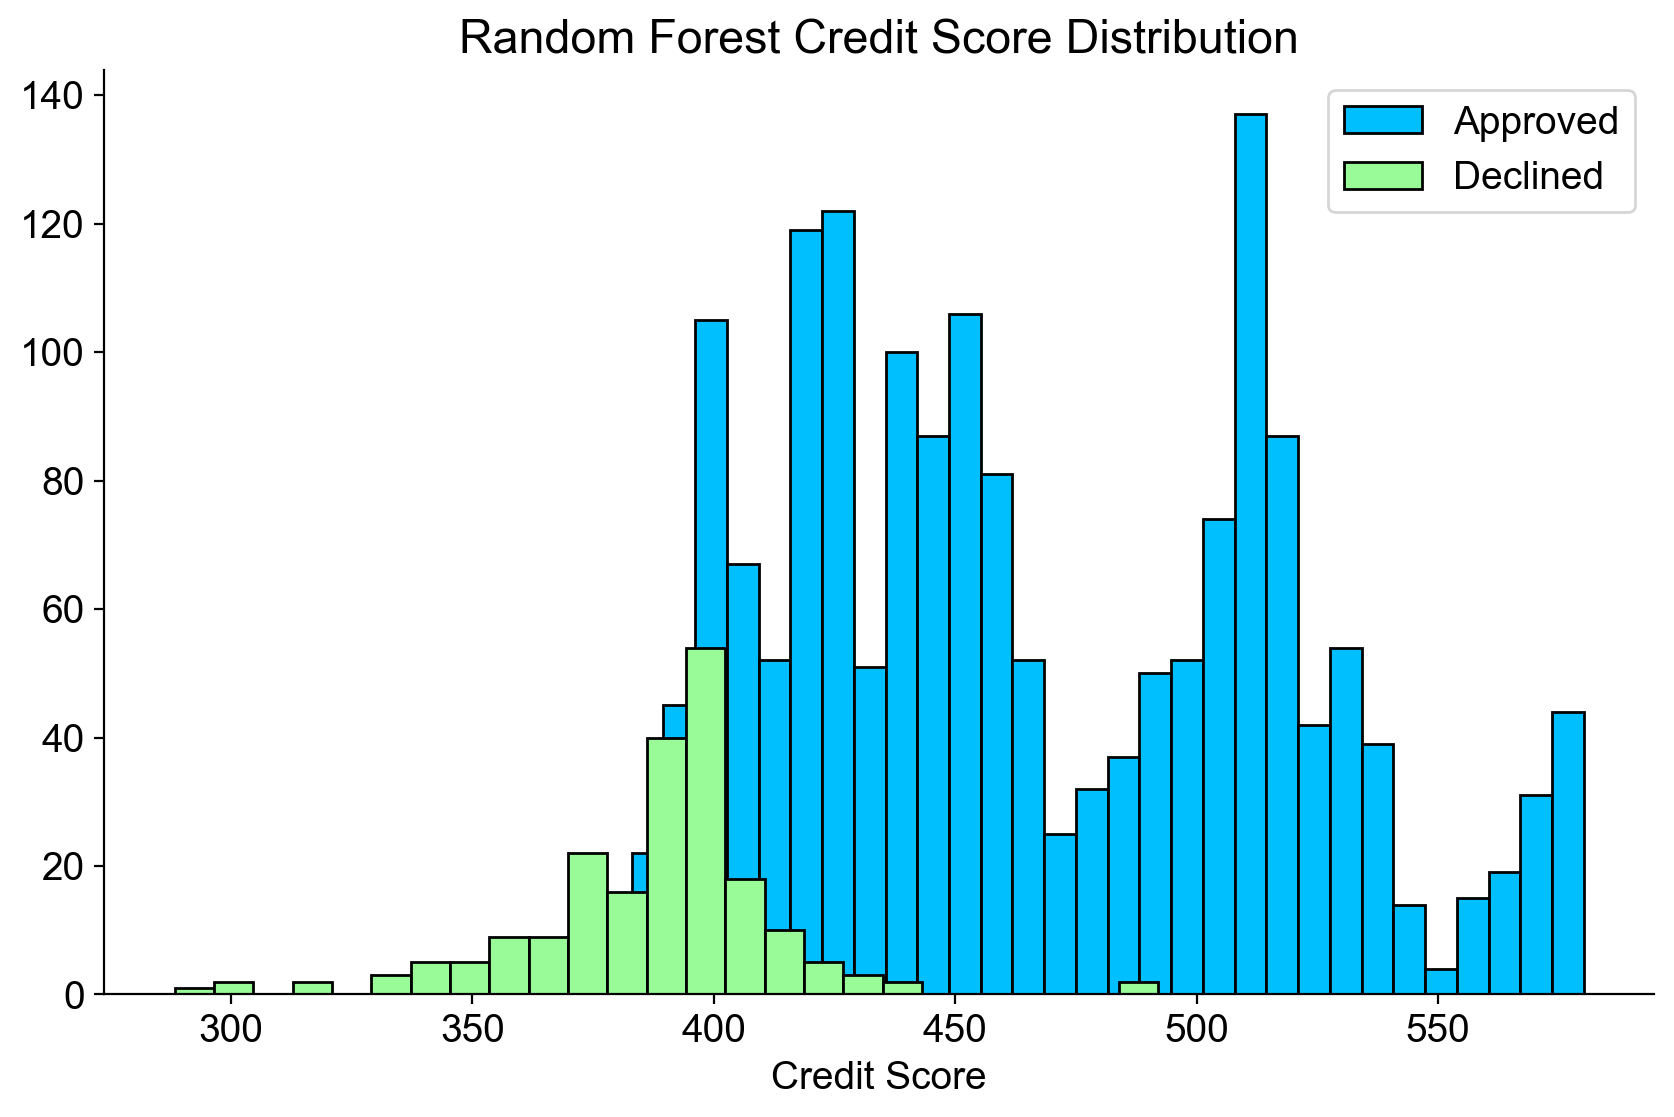

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

from rf_explainer import RandomForestAnalyzer

analyzer = RandomForestAnalyzer(rf, features, ["Good", "Bad"])
tree_data = analyzer.extract_tree_data_with_conditions()
leaf_data = analyzer.extract_leaf_nodes_with_conditions()

print(analyzer.print_tree(tree_id=0))

# Set font to Arial and 14
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

scores_per_tree = analyzer.prediction_score(rf, X_test)

plt.figure(figsize=(10, 6))
pd.Series(scores_per_tree[y_test == 0]).hist(bins='sqrt', color='deepskyblue', edgecolor='black')
pd.Series(scores_per_tree[y_test == 1]).hist(bins='auto', color='palegreen', edgecolor='black')
plt.xlabel('Credit Score')
plt.grid(False)
# disable spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Random Forest Credit Score Distribution')
plt.legend(['Approved', 'Declined'])
plt.show()